In [41]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import time
import pickle
import numpy as np

In [42]:
data = pd.read_csv('../data/processed_data.csv')
# Process type  ( Apartment: 0, Independent House: 1, Studio Apartment: 2, villa: 3 )
# Process status ( Ready to move: 0, under Construction: 1 )
for column in data:
    if column in ["bhk","status","house_type","new"]:
        print("Column Name: ", column)
        print(data[column].unique())
        print(data[column].value_counts())

Column Name:  bhk
[ 2  1  3  4  8  5  6  9 10  7]
bhk
2     20154
1     16596
3      7278
4      1103
5       162
6        39
7         5
8         2
9         2
10        2
Name: count, dtype: int64
Column Name:  status
[1 0]
status
0    26914
1    18429
Name: count, dtype: int64
Column Name:  house_type
[0 2 1 3]
house_type
0    44591
2      597
3      110
1       45
Name: count, dtype: int64
Column Name:  new
[0 1]
new
1    27143
0    18200
Name: count, dtype: int64


In [43]:
def preprocessing(data:pd.DataFrame) -> pd.DataFrame:
    data.drop(["status","new","house_type"], axis = 1, inplace = True)
    data = data.dropna()
    return data


In [44]:
processed_data = preprocessing(data)
for column in processed_data:
    print(column)

bhk
area
region
price_in_USD


In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = processed_data.drop(labels="price_in_USD",axis=1)
for column in X:
    if column in ["locality","region", "status", "age","type"]:
        X[column] = le.fit_transform(X[column])

Y = processed_data["price_in_USD"]
print(X.shape)
print(Y.shape)

(45343, 3)
(45343,)


In [46]:
from sklearn.model_selection import train_test_split
X_hold, X_test, Y_hold, Y_test = train_test_split(X,Y,test_size=0.05,random_state=0)
X_train, X_val, Y_train,Y_val = train_test_split(X_hold,Y_hold,test_size=0.05,random_state=0)

In [47]:
# from sklearn.model_selection import validation_curve
# 
# parameter_range = np.arange(1, 25, 1)
# 
# # Calculate accuracy on training and test set using the
# # gamma parameter with 5-fold cross validation
# train_score, val_score = validation_curve(RandomForestRegressor(n_estimators=10, random_state=42), X_hold, Y_hold,
#                                           param_name="max_depth",
#                                           param_range=parameter_range,
#                                           cv=4, scoring="r2")
# mean_train_score = np.mean(train_score, axis=1)
# std_train_score = np.std(train_score, axis=1)
# 
# mean_val_score = np.mean(val_score, axis=1)
# std_val_score = np.std(val_score, axis=1)
# 
# plt.plot(parameter_range, mean_train_score,
#          label="Training Score", color='b')
# plt.plot(parameter_range, mean_val_score,
#          label="Cross Validation Score", color='g')
# # Creating the plot
# plt.title("Validation Curve with Random Forest Regressor")
# plt.xlabel("Max depth")
# plt.ylabel("R2 Score")
# plt.tight_layout()
# plt.legend(loc='best')
# plt.show()

In [48]:
# from sklearn.model_selection import validation_curve
# 
# parameter_range = ["squared_error","absolute_error","friedman_mse", "poisson"]
# 
# # Calculate accuracy on training and test set using the
# # gamma parameter with 5-fold cross validation
# train_score, val_score = validation_curve(RandomForestRegressor(n_estimators=10, max_depth=16, random_state=42), X_hold, Y_hold,
#                                           param_name="criterion",
#                                           param_range=parameter_range,
#                                           cv=4, scoring="r2")
# mean_train_score = np.mean(train_score, axis=1)
# std_train_score = np.std(train_score, axis=1)
# 
# mean_val_score = np.mean(val_score, axis=1)
# std_val_score = np.std(val_score, axis=1)
# 
# plt.plot(parameter_range, mean_train_score,
#          label="Training Score", color='b')
# plt.plot(parameter_range, mean_val_score,
#          label="Cross Validation Score", color='g')
# # Creating the plot
# plt.title("Validation Curve with Random Forest Regressor")
# plt.xlabel("Criterion")
# plt.ylabel("R2 Score")
# plt.tight_layout()
# plt.legend(loc='best')
# plt.show()

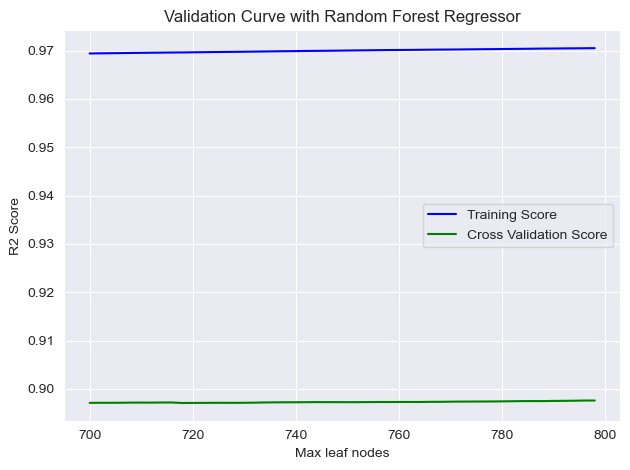

In [62]:
# from sklearn.model_selection import validation_curve
# 
# parameter_range = np.arange(700 , 800, 2)
# 
# # Calculate accuracy on training and test set using the
# # gamma parameter with 5-fold cross validation
# train_score, val_score = validation_curve(RandomForestRegressor(n_estimators=10, max_depth=16, random_state=42), X_hold, Y_hold,
#                                           param_name="max_leaf_nodes",
#                                           param_range=parameter_range,
#                                           cv=4, scoring="r2")
# mean_train_score = np.mean(train_score, axis=1)
# std_train_score = np.std(train_score, axis=1)
# 
# mean_val_score = np.mean(val_score, axis=1)
# std_val_score = np.std(val_score, axis=1)
# 
# plt.plot(parameter_range, mean_train_score,
#          label="Training Score", color='b')
# plt.plot(parameter_range, mean_val_score,
#          label="Cross Validation Score", color='g')
# # Creating the plot
# plt.title("Validation Curve with Random Forest Regressor")
# plt.xlabel("Max leaf nodes")
# plt.ylabel("R2 Score")
# plt.tight_layout()
# plt.legend(loc='best')
# plt.show()

In [50]:
# from sklearn.model_selection import learning_curve
# 
# # Calculate accuracy on training and test set using the
# # gamma parameter with 5-fold cross validation
# train_sizes, train_score, val_score = learning_curve(RandomForestRegressor(n_estimators=10,max_depth=16, random_state=42), X_hold, Y_hold,
#                                           cv=4, train_sizes=np.linspace(0.1, 1.0, 10),scoring="r2")
# 
# train_score_mean = np.mean(train_score, axis=1)
# train_score_std = np.std(train_score, axis=1)
# 
# val_score_mean = np.mean(val_score, axis=1)
# val_score_std = np.std(val_score, axis=1)
# 
# plt.plot(train_sizes, train_score_mean,
#          label="Training Score", color='b')
# plt.plot(train_sizes, val_score_mean,
#          label="Cross Validation Score", color='g')
# # Creating the plot
# plt.title("Learning Curve with Random Forest Regressor")
# plt.xlabel("Training examples")
# plt.ylabel("R2 Score")
# plt.tight_layout()
# plt.legend(loc='best')
# plt.show()

In [51]:
start = time.time()
# Create the model
model = RandomForestRegressor(n_estimators=10, max_depth=16 , random_state=42)
print("Start training...")
model.fit(X_train, Y_train)
end = time.time()
print("Time execution : ", end - start)
pickle.dump(model, open('../models/RandomForest2', 'wb'))

Start training...
Time execution :  0.5221168994903564


In [52]:
loaded_model = pickle.load(open('../models/RandomForest2', 'rb'))

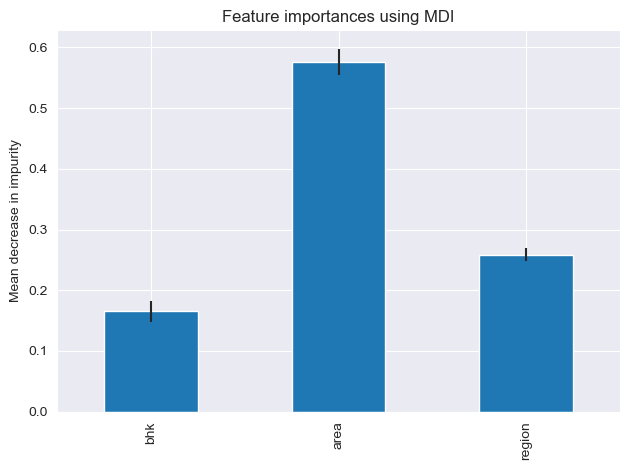

In [53]:
feature_names = [f"{column}" for column in X_train]
importances = loaded_model.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in loaded_model.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [54]:
#Make the predictions 
pred_table = pd.DataFrame(data={"actual value":Y_test, "predicted":loaded_model.predict(X_test)})
pred_table["difference"] = pred_table["actual value"] - pred_table["predicted"]
pred_table

,actual value,predicted,difference
17052,32400.0,34608.895820,-2208.895820
7961,28560.0,35863.591703,-7303.591703
39704,306000.0,323285.454545,-17285.454545
13523,156000.0,170099.469642,-14099.469642
11833,111600.0,114190.370162,-2590.370162
...,...,...,...
14713,138000.0,127233.438631,10766.561369
4904,300000.0,279192.601397,20807.398603
39029,99144.0,100976.630043,-1832.630043
24779,115200.0,117523.475702,-2323.475702


In [55]:
from sklearn.metrics import r2_score
#Test the model
pred_train = loaded_model.predict(X_train)
pred_val = loaded_model.predict(X_val)
pred_test = loaded_model.predict(X_test)
train_accuracy = r2_score(pred_train, Y_train)
val_accuracy = r2_score(pred_val, Y_val)
test_accuracy = r2_score(pred_test, Y_test)
print('Training accuracy: ',train_accuracy)
print('Validation accuracy: ', val_accuracy)
print('Test accuracy: ',test_accuracy)

Training accuracy:  0.975482041163716
Validation accuracy:  0.9044165383197788
Test accuracy:  0.8941784861481998


In [56]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(Y_train, pred_train)
mse_val = mean_squared_error(Y_val, pred_val)
mse_test = mean_squared_error(Y_test, pred_test)
print('Training mean squared error: ', mse_train)
print('Validation mean squared error: ', mse_val)
print('Test mean squared error: ', mse_test)

Training mean squared error:  1000902448.712182
Validation mean squared error:  3238531963.0677376
Test mean squared error:  3213131293.961096


In [57]:
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(Y_train, pred_train)
mae_val = mean_absolute_error(Y_val, pred_val)
mae_test = mean_absolute_error(Y_test, pred_test)
print('Training mean absolute error: ', mae_train)
print('Validation mean absolute error: ', mae_val)
print('Test mean absolute error: ', mae_test)

Training mean absolute error:  15904.015925779897
Validation mean absolute error:  21184.640733491447
Test mean absolute error:  20415.940870541566
